In [313]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.feature_selection as fs
import sklearn.preprocessing as pp

#load csv file
data = pd.read_csv('credit_cards.csv')

In [314]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,17270,130000,2,2,1,34,0,0,0,0,...,105478,107725,109994,3700,5300,4000,4000,4000,6100,0
1,22364,290000,2,1,2,27,-1,-1,0,0,...,1503,834,931,569,1000,1000,200,265,500,0
2,23880,360000,1,1,2,27,-2,-2,-2,-2,...,1390,-5,-5,898,5970,1396,0,0,0,0
3,9074,110000,2,1,2,35,-1,2,-1,0,...,790,806,1729,0,1166,0,446,1729,0,0
4,25083,260000,1,3,1,48,0,0,0,0,...,155059,141570,134143,8000,6000,7100,5300,5000,5000,0


In [315]:
#Task #1.a: Determine if there are missing values
#my results show there are no missing values in this set
pd.isnull(data).sum()


ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

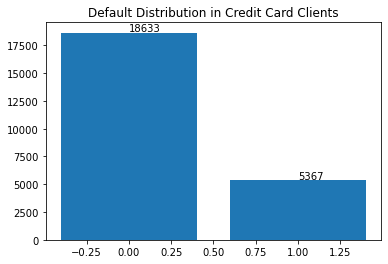

In [316]:
#Task #1.b: plot the distribution of the class attr
#the data distribution is imbalanced
height = data['DEFAULT'].value_counts()
x_axis = np.arange(2)
plt.bar(x_axis, height)
plt.text(0, height[0]+100, str(height[0]))
plt.text(1, height[1]+100, str(height[1]))
plt.title('Default Distribution in Credit Card Clients')
plt.show()

In [317]:
#Task #2.c: employ chi-square
chi2 = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
feat_chi2 = pd.DataFrame(data, columns=chi2)
pays = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for p in pays:
    feat_chi2[p] += 2
chi2_score = fs.chi2(feat_chi2, data['DEFAULT'])

#Task #2.c: rank features based on chi-square score
chi_rank = [['SEX', chi2_score[0][0]], ['EDUCATION', chi2_score[0][1]], ['MARRIAGE', chi2_score[0][2]], ['PAY_1', chi2_score[0][3]], ['PAY_2', chi2_score[0][4]], ['PAY_3', chi2_score[0][5]], ['PAY_4', chi2_score[0][6]], ['PAY_5', chi2_score[0][7]], ['PAY_6', chi2_score[0][8]]]
chi_rank.sort(key=lambda x: x[1], reverse=True)
chi_rank

[[&#39;PAY_1&#39;, 1610.4583087475273],
 [&#39;PAY_2&#39;, 1305.2207320318512],
 [&#39;PAY_3&#39;, 1053.775893726345],
 [&#39;PAY_4&#39;, 897.0595099970005],
 [&#39;PAY_5&#39;, 766.9219999029481],
 [&#39;PAY_6&#39;, 671.2351174507124],
 [&#39;EDUCATION&#39;, 7.960018119960557],
 [&#39;SEX&#39;, 6.674043295696058],
 [&#39;MARRIAGE&#39;, 1.8643110840125992]]

In [318]:
#Task #2.c: employ mutual information
muti = ['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
feat_muti = pd.DataFrame(data, columns=muti)
muti_score = fs.mutual_info_classif(feat_muti, data['DEFAULT'], random_state=156)

#Task #2.c: rank features based on mutual information score
muti_rank = [['ID', muti_score[0]], ['LIMIT_BAL', muti_score[1]], ['AGE', muti_score[2]], ['BILL_AMT1', muti_score[3]],['BILL_AMT2', muti_score[4]],['BILL_AMT3', muti_score[5]],['BILL_AMT4', muti_score[6]],['BILL_AMT5', muti_score[7]],['BILL_AMT6', muti_score[8]], ['PAY_AMT1', muti_score[9]], ['PAY_AMT2', muti_score[10]], ['PAY_AMT3', muti_score[11]], ['PAY_AMT4', muti_score[12]], ['PAY_AMT5', muti_score[13]], ['PAY_AMT6', muti_score[14]]]
muti_rank.sort(key=lambda x: x[1], reverse=True)
muti_rank

[[&#39;PAY_AMT1&#39;, 0.025969171248109157],
 [&#39;PAY_AMT2&#39;, 0.02028390677508174],
 [&#39;PAY_AMT4&#39;, 0.019179568505570677],
 [&#39;PAY_AMT3&#39;, 0.0181813310199046],
 [&#39;PAY_AMT5&#39;, 0.015933694831827605],
 [&#39;LIMIT_BAL&#39;, 0.014592946823962949],
 [&#39;BILL_AMT2&#39;, 0.011128396115730466],
 [&#39;PAY_AMT6&#39;, 0.010768694406007695],
 [&#39;BILL_AMT1&#39;, 0.009366552295730024],
 [&#39;BILL_AMT6&#39;, 0.00666768590100153],
 [&#39;BILL_AMT5&#39;, 0.0053718243363829465],
 [&#39;BILL_AMT3&#39;, 0.005075784417356122],
 [&#39;BILL_AMT4&#39;, 0.004046940743381633],
 [&#39;AGE&#39;, 0.003011029715418889],
 [&#39;ID&#39;, 0.0022459776740089143]]

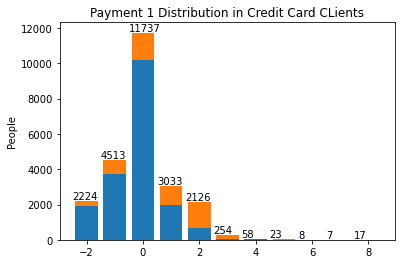

In [319]:
#Task #3.i: plotting highest ranked categorical feature
x = data[chi_rank[0][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[0][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[0][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-.5, n+y+100, str(n+y))

ax.bar(x, no, label='no')
ax.bar(x, yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Payment 1 Distribution in Credit Card CLients')

plt.show()

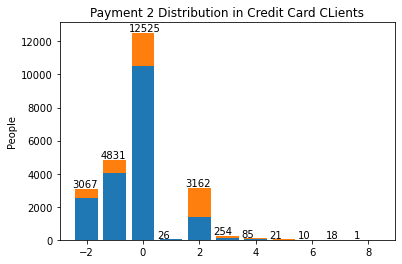

In [320]:
#Task #3.i: plotting 2nd highest ranked categorical feature
x = data[chi_rank[1][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[1][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[1][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-.5, n+y+100, str(n+y))

ax.bar(x, no, label='no')
ax.bar(x, yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Payment 2 Distribution in Credit Card CLients')

plt.show()


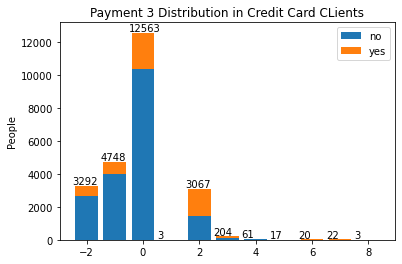

In [321]:
#Task #3.i: plotting 3rd highest ranked categorical feature
x = data[chi_rank[2][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[2][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[2][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-.5, n+y+100, str(n+y))

ax.bar(x, no, label='no')
ax.bar(x, yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Payment 3 Distribution in Credit Card CLients')
ax.legend()

plt.show()

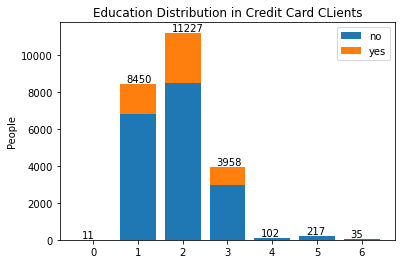

In [322]:
#Task #3.ii: plotting 3rd lowest ranked categorical feature
x = data[chi_rank[-3][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[-3][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[-3][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-.25, n+y+100, str(n+y))

ax.bar(x, no, label='no')
ax.bar(x, yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Education Distribution in Credit Card CLients')
ax.legend()

plt.show()

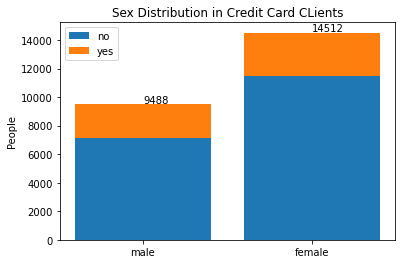

In [323]:
#Task #3.ii: plotting 2nd lowest ranked categorical feature
x = data[chi_rank[-2][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[-2][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[-2][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-1, n+y+100, str(n+y))

ax.bar(['male', 'female'], no, label='no')
ax.bar(['male', 'female'], yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Sex Distribution in Credit Card CLients')
ax.legend()

plt.show()

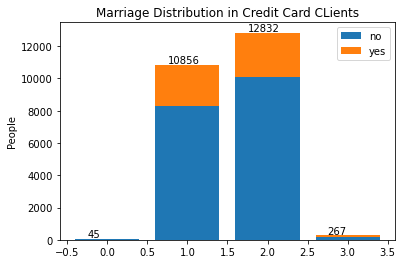

In [324]:
#Task #3.ii: plotting lowest ranked categorical feature
x = data[chi_rank[-1][0]].unique()
x.sort()
no = []
yes = []
fig, ax = plt.subplots()

for item in x:
    n = len(data[ (data['DEFAULT'] == 0) & (data[chi_rank[-1][0]] == item)])
    y = len(data[ (data['DEFAULT'] == 1) & (data[chi_rank[-1][0]] == item)])
    no.append(n)
    yes.append(y)
    ax.text(item-.25, n+y+100, str(n+y))

ax.bar(x, no, label='no')
ax.bar(x, yes, bottom=no, label='yes')

ax.set_ylabel('People')
ax.set_title('Marriage Distribution in Credit Card CLients')
ax.legend()

plt.show()

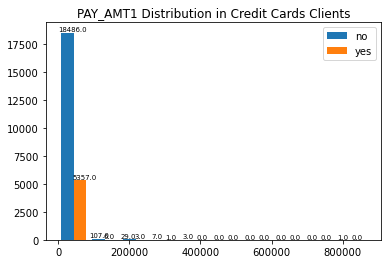

In [325]:
#Task #3.iii: plotting highest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[0][0]]
y = data[data['DEFAULT'] == 1][muti_rank[0][0]]
plot = plt.hist([x, y], label=['no', 'yes'], bins=10)
plt.legend(loc='upper right')
plt.title(label=muti_rank[0][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b] + 100, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+40000, plot[0][1][b] + 100, str(plot[0][1][b]), fontsize='x-small')
plt.show()

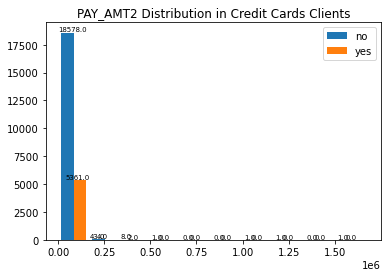

In [326]:
#Task #3.iii: plotting 2nd highest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[1][0]]
y = data[data['DEFAULT'] == 1][muti_rank[1][0]]
plot = plt.hist([x, y], label=['no', 'yes'])
plt.legend(loc='upper right')
plt.title(label= muti_rank[1][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b] + 100, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+40000, plot[0][1][b] + 100, str(plot[0][1][b]), fontsize='x-small')
plt.show()

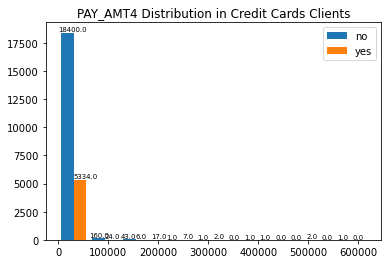

In [327]:
#Task #3.iii: plotting third highest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[2][0]]
y = data[data['DEFAULT'] == 1][muti_rank[2][0]]
plot = plt.hist([x, y], label=['no', 'yes'])
plt.legend(loc='upper right')
plt.title(label=muti_rank[2][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b] + 100, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+30000, plot[0][1][b] + 100, str(plot[0][1][b]), fontsize='x-small')
plt.show()

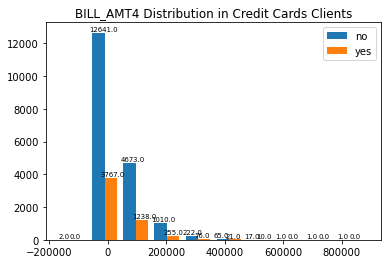

In [328]:
#Task #3.iv: plotting third lowest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[-3][0]]
y = data[data['DEFAULT'] == 1][muti_rank[-3][0]]
plot = plt.hist([x, y], label=['no', 'yes'])
plt.legend(loc='upper right')
plt.title(label= muti_rank[-3][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b] + 100, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+40000, plot[0][1][b] + 100, str(plot[0][1][b]), fontsize='x-small')
plt.show()

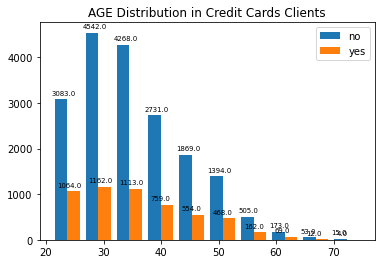

In [329]:
#Task #3.iv: plotting second lowest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[-2][0]]
y = data[data['DEFAULT'] == 1][muti_rank[-2][0]]
plot = plt.hist([x, y], label=['no', 'yes'])
plt.legend(loc='upper right')
plt.title(label= muti_rank[-2][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b]+100, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+1, plot[0][1][b]+100, str(plot[0][1][b]), fontsize='x-small')
plt.show()

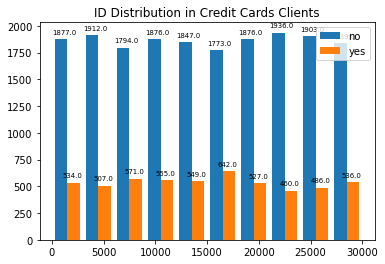

In [330]:
#Task #3.iv: plotting lowest ranked numerical feature
x = data[data['DEFAULT'] == 0][muti_rank[-1][0]]
y = data[data['DEFAULT'] == 1][muti_rank[-1][0]]
plot = plt.hist([x, y], label=['no', 'yes'], bins=10)
plt.legend(loc='upper right')
plt.title(label=muti_rank[-1][0] + " Distribution in Credit Cards Clients")
for b in range(10):
    plt.text(plot[1][b], plot[0][0][b] + 50, str(plot[0][0][b]), fontsize='x-small')
    plt.text(plot[1][b]+1000, plot[0][1][b] + 50, str(plot[0][1][b]), fontsize='x-small')
plt.show()

In [331]:
#Preprocessing Task #3: generate a new feature
#new feature: avg_net = avg(bill_amt(1-6)) - avg(pay_amt(1-6))
avg_bill = data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] + data['BILL_AMT5'] + data['BILL_AMT6']
avg_bill = avg_bill / 6
avg_payamt = data['PAY_AMT1'] + data['PAY_AMT2'] + data['PAY_AMT3'] + data['PAY_AMT4'] + data['PAY_AMT5'] + data['PAY_AMT6']
avg_payamt = avg_payamt / 6
data['AVG_NET'] = avg_bill - avg_payamt

In [332]:
#Task #4: normalize values of numerical features to the range (0,1)
muti.append('AVG_NET')
numericals = pd.DataFrame(data, columns=muti)
scaler = pp.MinMaxScaler()
norm = scaler.fit_transform(numericals)
j=0
for feat in muti:
    print('Original Range for {0}: ({1}, {2})'.format(feat, numericals[feat].min(), numericals[feat].max()))
    print('Normalized Range for {0}: ({1}, {2})'.format(feat, norm[j].min(), norm[j].max()))
    j += 1

Original Range for ID: (1, 30000)
Normalized Range for ID: (0.0031467844316105777, 0.575652521750725)
Original Range for LIMIT_BAL: (10000, 1000000)
Normalized Range for LIMIT_BAL: (0.00032206119162640903, 0.745458181939398)
Original Range for AGE: (21, 75)
Normalized Range for AGE: (0.0, 0.7959931997733257)
Original Range for BILL_AMT1: (-154973, 964511)
Normalized Range for BILL_AMT1: (0.0, 0.39386445329523245)
Original Range for BILL_AMT2: (-69777, 983931)
Normalized Range for BILL_AMT2: (0.003562397469747824, 0.8360945364845495)
Original Range for BILL_AMT3: (-157264, 1664089)
Normalized Range for BILL_AMT3: (0.0029947888062346706, 0.42122127516760727)
Original Range for BILL_AMT4: (-170000, 891586)
Normalized Range for BILL_AMT4: (0.0, 0.5936197873262442)
Original Range for BILL_AMT5: (-81334, 927171)
Normalized Range for BILL_AMT5: (0.005915360998516262, 0.494949494949495)
Original Range for BILL_AMT6: (-339603, 961664)
Normalized Range for BILL_AMT6: (0.002671798102310868, 0.518

In [333]:
#Task #5: Encode Categorical Features
categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cats = pd.DataFrame(data, columns=categoricals)
encoder = pp.OneHotEncoder()
encoder.fit(cats)
feat_name = encoder.get_feature_names(categoricals)
encoded = pd.DataFrame(encoder.transform(cats).toarray())
encoded.columns = feat_name
encoded = encoded.rename(columns={'SEX_1': 'SEX_IS_MALE', 'SEX_2': 'SEX_IS_FEMALE', 'EDUCATION_0': 'EDUCATION_IS_NONE', 'EDUCATION_1': 'EDUCATION_IS_GRADUATE_SCHOOL', 'EDUCATION_2': 'EDUCATION_IS_UNIVERSITY', 'EDUCATION_3': 'EDUCATION_IS_HIGHSCHOOL', 'EDUCATION_4': 'EDUCATION_IS_OTHER', 'EDUCATION_5': 'EDUCATION_IS_UNKNOWN5', 'EDUCATION_6': 'EDUCATION_IS_UNKNOWN6', 'MARRIAGE_0': 'MARRIAGE_IS_UNKNWON', 'MARRIAGE_1': 'MARRIAGE_IS_MARRIED', 'MARRIAGE_2': 'MARRIAGE_IS_SINGLE', 'MARRIAGE_3': 'MARRIAGE_IS_OTHER', 'PAY_1_-2': 'PAY1_IS_NOTHING_DUE', 'PAY_1_-1': 'PAY1_IS_PAID_DULY', 'PAY_1_0': 'PAY1_IS_MIN_PAYMENT', 'PAY_1_1': 'PAY1_IS_LATE1', 'PAY_1_2': 'PAY1_IS_LATE2', 'PAY_1_3': 'PAY1_IS_LATE3', 'PAY_1_4': 'PAY1_IS_LATE4', 'PAY_1_5': 'PAY1_IS_LATE5', 'PAY_1_6': 'PAY1_IS_LATE6', 'PAY_1_7': 'PAY1_IS_LATE7', 'PAY_1_8': 'PAY1_IS_LATE8', 'PAY_2_-2': 'PAY2_IS_NOTHING_DUE', 'PAY_2_-1': 'PAY2_IS_PAID_DULY', 'PAY_2_0': 'PAY2_IS_MIN_PAYMENT', 'PAY_2_1': 'PAY2_IS_LATE1', 'PAY_2_2': 'PAY2_IS_LATE2', 'PAY_2_3': 'PAY2_IS_LATE3', 'PAY_2_4': 'PAY2_IS_LATE4', 'PAY_2_5': 'PAY2_IS_LATE5', 'PAY_2_6': 'PAY2_IS_LATE6', 'PAY_2_7': 'PAY2_IS_LATE7', 'PAY_2_8': 'PAY2_IS_LATE8', 'PAY_3_-2': 'PAY3_IS_NOTHING_DUE', 'PAY_3_-1': 'PAY3_IS_PAID_DULY', 'PAY_3_0': 'PAY3_IS_MIN_PAYMENT', 'PAY_3_1': 'PAY3_IS_LATE1', 'PAY_3_2': 'PAY3_IS_LATE2', 'PAY_3_3': 'PAY3_IS_LATE3', 'PAY_3_4': 'PAY3_IS_LATE4', 'PAY_3_5': 'PAY3_IS_LATE5', 'PAY_3_6': 'PAY3_IS_LATE6', 'PAY_3_7': 'PAY3_IS_LATE7', 'PAY_3_8': 'PAY3_IS_LATE8', 'PAY_4_-2': 'PAY4_IS_NOTHING_DUE', 'PAY_4_-1': 'PAY4_IS_PAID_DULY', 'PAY_4_0': 'PAY4_IS_MIN_PAYMENT', 'PAY_4_1': 'PAY4_IS_LATE1', 'PAY_4_2': 'PAY4_IS_LATE2', 'PAY_4_3': 'PAY4_IS_LATE3', 'PAY_4_4': 'PAY4_IS_LATE4', 'PAY_4_5': 'PAY4_IS_LATE5', 'PAY_4_6': 'PAY4_IS_LATE6', 'PAY_4_7': 'PAY4_IS_LATE7', 'PAY_4_8': 'PAY4_IS_LATE8', 'PAY_5_-2': 'PAY5_IS_NOTHING_DUE', 'PAY_5_-1': 'PAY5_IS_PAID_DULY', 'PAY_5_0': 'PAY5_IS_MIN_PAYMENT', 'PAY_5_1': 'PAY5_IS_LATE1', 'PAY_5_2': 'PAY5_IS_LATE2', 'PAY_5_3': 'PAY5_IS_LATE3', 'PAY_5_4': 'PAY5_IS_LATE4', 'PAY_5_5': 'PAY5_IS_LATE5', 'PAY_5_6': 'PAY5_IS_LATE6', 'PAY_5_7': 'PAY5_IS_LATE7', 'PAY_5_8': 'PAY5_IS_LATE8', 'PAY_6_-2': 'PAY6_IS_NOTHING_DUE', 'PAY_6_-1': 'PAY6_IS_PAID_DULY', 'PAY_6_0': 'PAY6_IS_MIN_PAYMENT', 'PAY_6_1': 'PAY6_IS_LATE1', 'PAY_6_2': 'PAY6_IS_LATE2', 'PAY_6_3': 'PAY6_IS_LATE3', 'PAY_6_4': 'PAY6_IS_LATE4', 'PAY_6_5': 'PAY6_IS_LATE5', 'PAY_6_6': 'PAY6_IS_LATE6', 'PAY_6_7': 'PAY6_IS_LATE7', 'PAY_6_8': 'PAY6_IS_LATE8'})

for col in encoded.columns:
    print("{0}: {1}".format(col, len(encoded[encoded[col] == 1])))


SEX_IS_MALE: 9488
SEX_IS_FEMALE: 14512
EDUCATION_IS_NONE: 11
EDUCATION_IS_GRADUATE_SCHOOL: 8450
EDUCATION_IS_UNIVERSITY: 11227
EDUCATION_IS_HIGHSCHOOL: 3958
EDUCATION_IS_OTHER: 102
EDUCATION_IS_UNKNOWN5: 217
EDUCATION_IS_UNKNOWN6: 35
MARRIAGE_IS_UNKNWON: 45
MARRIAGE_IS_MARRIED: 10856
MARRIAGE_IS_SINGLE: 12832
MARRIAGE_IS_OTHER: 267
PAY1_IS_NOTHING_DUE: 2224
PAY1_IS_PAID_DULY: 4513
PAY1_IS_MIN_PAYMENT: 11737
PAY1_IS_LATE1: 3033
PAY1_IS_LATE2: 2126
PAY1_IS_LATE3: 254
PAY1_IS_LATE4: 58
PAY1_IS_LATE5: 23
PAY1_IS_LATE6: 8
PAY1_IS_LATE7: 7
PAY1_IS_LATE8: 17
PAY2_IS_NOTHING_DUE: 3067
PAY2_IS_PAID_DULY: 4831
PAY2_IS_MIN_PAYMENT: 12525
PAY2_IS_LATE1: 26
PAY2_IS_LATE2: 3162
PAY2_IS_LATE3: 254
PAY2_IS_LATE4: 85
PAY2_IS_LATE5: 21
PAY2_IS_LATE6: 10
PAY2_IS_LATE7: 18
PAY2_IS_LATE8: 1
PAY3_IS_NOTHING_DUE: 3292
PAY3_IS_PAID_DULY: 4748
PAY3_IS_MIN_PAYMENT: 12563
PAY3_IS_LATE1: 3
PAY3_IS_LATE2: 3067
PAY3_IS_LATE3: 204
PAY3_IS_LATE4: 61
PAY3_IS_LATE5: 17
PAY3_IS_LATE6: 20
PAY3_IS_LATE7: 22
PAY3_IS_LATE8: